## NER Analysis Using Hugging Face, Car Dataset

##### Adithya Harsha ,  DePaul,IL, CHicago ,  Capstone - Software Presentation,  NER wit Bert 

### 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline


### 2. Load and Explore the Dataset

In [2]:
# Load the dataset from the text file
file_path = 'cars_dataset.txt'  # Ensure the path is correct
cars_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("Initial DataFrame:")
print(cars_df.head())


Initial DataFrame:
  Car_Model Manufacturer  Year  Engine_Size Fuel_Type  Price     Location
0   Model S        Tesla  2022          2.0  Electric  85000    Palo Alto
1     Civic        Honda  2020          1.5    Petrol  25000        Tokyo
2   Mustang         Ford  2021          3.5    Petrol  58000      Detroit
3        A4         Audi  2022          2.0    Diesel  42000       Berlin
4   Corolla       Toyota  2019          1.8    Petrol  20000  Los Angeles


### 3. Data Cleaning and Preprocessing

In [3]:
# Clean the Price column: Remove dollar sign and convert to numeric
cars_df['Price'] = cars_df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert other columns to appropriate types
cars_df['Year'] = cars_df['Year'].astype(int)
cars_df['Engine_Size'] = cars_df['Engine_Size'].astype(float)

# Check for missing values
missing_values = cars_df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Display cleaned DataFrame info
print("\nCleaned DataFrame Info:")
print(cars_df.info())



Missing Values in Each Column:
Car_Model       0
Manufacturer    0
Year            0
Engine_Size     0
Fuel_Type       0
Price           0
Location        0
dtype: int64

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_Model     12 non-null     object 
 1   Manufacturer  12 non-null     object 
 2   Year          12 non-null     int32  
 3   Engine_Size   12 non-null     float64
 4   Fuel_Type     12 non-null     object 
 5   Price         12 non-null     float64
 6   Location      12 non-null     object 
dtypes: float64(2), int32(1), object(4)
memory usage: 752.0+ bytes
None


In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(cars_df.describe())



Summary Statistics:
              Year  Engine_Size         Price
count    12.000000    12.000000     12.000000
mean   2020.833333     2.275000  47000.000000
std       1.114641     0.801277  24499.536174
min    2019.000000     1.200000  18500.000000
25%    2020.000000     1.800000  26875.000000
50%    2021.000000     2.000000  46000.000000
75%    2022.000000     2.500000  59750.000000
max    2022.000000     4.000000  90000.000000


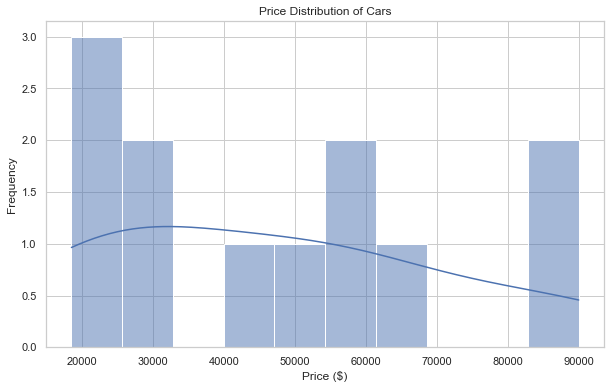

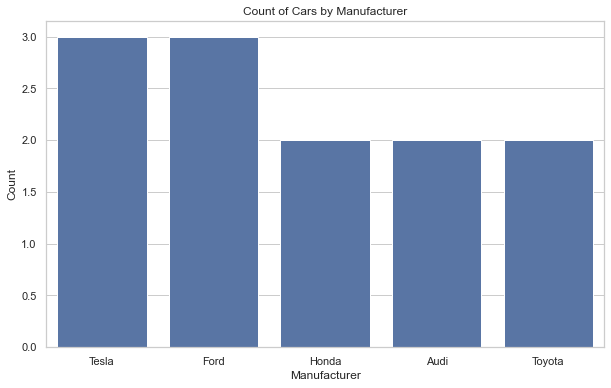

In [7]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Visualize the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(cars_df['Price'], bins=10, kde=True)
plt.title('Price Distribution of Cars')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of cars by Manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(data=cars_df, x='Manufacturer', order=cars_df['Manufacturer'].value_counts().index)
plt.title('Count of Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

In [8]:
# Generate descriptions for each car
car_descriptions = []
for index, row in cars_df.iterrows():
    description = f"The {row['Manufacturer']} {row['Car_Model']} is a {row['Fuel_Type'].lower()} car priced at ${row['Price']:,.2f}, available in {row['Location']}. It has a {row['Engine_Size']}-liter engine and was manufactured in {row['Year']}."
    car_descriptions.append(description)

# Display a sample description
print("\nSample Description:")
print(car_descriptions[0])



Sample Description:
The Tesla Model S is a electric car priced at $85,000.00, available in Palo Alto. It has a 2.0-liter engine and was manufactured in 2022.


### 7. Load Pre-trained NER Model

In [9]:
# Load the NER pipeline from Hugging Face
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
# Perform NER on each car description
for description in car_descriptions:
    ner_results = ner_pipeline(description)
    print(f"\nDescription: {description}")
    for entity in ner_results:
        print(f"  Entity: {entity['word']}, Type: {entity['entity']}, Confidence: {entity['score']:.4f}")



Description: The Tesla Model S is a electric car priced at $85,000.00, available in Palo Alto. It has a 2.0-liter engine and was manufactured in 2022.
  Entity: Te, Type: I-MISC, Confidence: 0.9982
  Entity: ##sla, Type: I-MISC, Confidence: 0.9971
  Entity: Model, Type: I-MISC, Confidence: 0.9934
  Entity: S, Type: I-MISC, Confidence: 0.9969
  Entity: Pa, Type: I-LOC, Confidence: 0.9981
  Entity: ##lo, Type: I-LOC, Confidence: 0.9864
  Entity: Alto, Type: I-LOC, Confidence: 0.9980

Description: The Honda Civic is a petrol car priced at $25,000.00, available in Tokyo. It has a 1.5-liter engine and was manufactured in 2020.
  Entity: Honda, Type: I-MISC, Confidence: 0.9966
  Entity: Civic, Type: I-MISC, Confidence: 0.9976
  Entity: Tokyo, Type: I-LOC, Confidence: 0.9997

Description: The Ford Mustang is a petrol car priced at $58,000.00, available in Detroit. It has a 3.5-liter engine and was manufactured in 2021.
  Entity: Ford, Type: I-MISC, Confidence: 0.9976
  Entity: Mustang, Type:

### 9. Organize NER Results into a DataFrame

In [11]:
# List to store the NER results
ner_data = []

# Perform NER on each car description and store results in a list
for description in car_descriptions:
    ner_results = ner_pipeline(description)
    for entity in ner_results:
        ner_data.append({
            'Description': description,
            'Entity': entity['word'],
            'Type': entity['entity'],
            'Confidence': entity['score']
        })

# Convert the list to a pandas DataFrame
ner_df = pd.DataFrame(ner_data)

# Display the first few rows
print(ner_df.head())


                                         Description Entity    Type  \
0  The Tesla Model S is a electric car priced at ...     Te  I-MISC   
1  The Tesla Model S is a electric car priced at ...  ##sla  I-MISC   
2  The Tesla Model S is a electric car priced at ...  Model  I-MISC   
3  The Tesla Model S is a electric car priced at ...      S  I-MISC   
4  The Tesla Model S is a electric car priced at ...     Pa   I-LOC   

   Confidence  
0    0.998234  
1    0.997095  
2    0.993359  
3    0.996876  
4    0.998130  


### 10. Analyze and Visualize NER Results



In [12]:
# Group by entity type and count occurrences
entity_counts = ner_df.groupby('Type')['Entity'].count()
print("\nEntity counts by type:")
print(entity_counts)

# Filter the DataFrame to show only location entities
loc_entities = ner_df[ner_df['Type'] == 'I-LOC']
print("\nLocation Entities:")
print(loc_entities)

# Similarly, filter for miscellaneous entities
misc_entities = ner_df[ner_df['Type'] == 'I-MISC']
print("\nMiscellaneous Entities:")
print(misc_entities)



Entity counts by type:
Type
I-LOC     19
I-MISC    40
Name: Entity, dtype: int64

Location Entities:
                                          Description     Entity   Type  \
4   The Tesla Model S is a electric car priced at ...         Pa  I-LOC   
5   The Tesla Model S is a electric car priced at ...       ##lo  I-LOC   
6   The Tesla Model S is a electric car priced at ...       Alto  I-LOC   
9   The Honda Civic is a petrol car priced at $25,...      Tokyo  I-LOC   
12  The Ford Mustang is a petrol car priced at $58...    Detroit  I-LOC   
16  The Audi A4 is a diesel car priced at $42,000....     Berlin  I-LOC   
21  The Toyota Corolla is a petrol car priced at $...        Los  I-LOC   
22  The Toyota Corolla is a petrol car priced at $...    Angeles  I-LOC   
27  The Tesla Model 3 is a electric car priced at ...        San  I-LOC   
28  The Tesla Model 3 is a electric car priced at ...  Francisco  I-LOC   
32  The Toyota Camry is a petrol car priced at $28...        New  I-LOC  

###  11. Additional Insights and Entity-Type Filtering

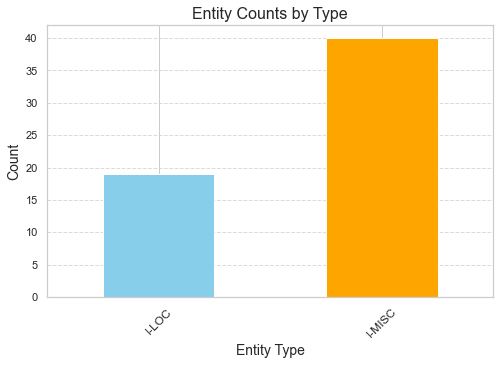

C:\Users\dell\AppData\Local\Temp\ipykernel_14492\811282660.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


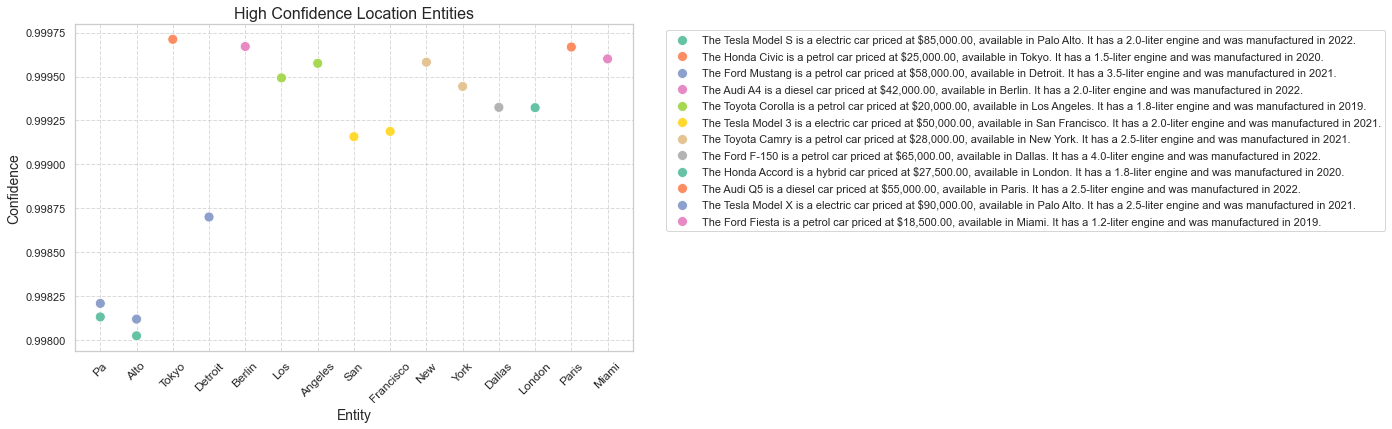


High-Confidence Miscellaneous Entities Table:
     Entity  Confidence                                        Description
0        Te    0.998234  The Tesla Model S is a electric car priced at ...
1     ##sla    0.997095  The Tesla Model S is a electric car priced at ...
2     Model    0.993359  The Tesla Model S is a electric car priced at ...
3         S    0.996876  The Tesla Model S is a electric car priced at ...
7     Honda    0.996594  The Honda Civic is a petrol car priced at $25,...
8     Civic    0.997602  The Honda Civic is a petrol car priced at $25,...
10     Ford    0.997607  The Ford Mustang is a petrol car priced at $58...
11  Mustang    0.997197  The Ford Mustang is a petrol car priced at $58...
13     Audi    0.998204  The Audi A4 is a diesel car priced at $42,000....
14        A    0.993615  The Audi A4 is a diesel car priced at $42,000....
15      ##4    0.994243  The Audi A4 is a diesel car priced at $42,000....
17   Toyota    0.996957  The Toyota Corolla is a petr

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of entity counts by type
plt.figure(figsize=(8, 5))
entity_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Entity Counts by Type", fontsize=16)
plt.xlabel("Entity Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter plot for high-confidence location entities
plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_confidence_locs, x='Entity', y='Confidence', hue='Description', palette='Set2', s=100)
plt.title("High Confidence Location Entities", fontsize=16)
plt.xlabel("Entity", fontsize=14)
plt.ylabel("Confidence", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Table for high-confidence miscellaneous entities
print("\nHigh-Confidence Miscellaneous Entities Table:")
print(high_confidence_misc[['Entity', 'Confidence', 'Description']])


In [22]:
import plotly.express as px

# Interactive bar chart for entity counts
fig_bar = px.bar(
    entity_counts, 
    x=entity_counts.index, 
    y=entity_counts.values,
    labels={'x': 'Entity Type', 'y': 'Count'},
    color=entity_counts.values,
    title="Entity Counts by Type"
)
fig_bar.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins
    height=500,  # Set chart height
    width=800    # Set chart width
)
fig_bar.show()




In [21]:
import plotly.express as px

# Interactive scatter plot for high-confidence location entities
fig = px.scatter(
    high_confidence_locs,
    x='Entity',
    y='Confidence',
    color='Description',
    size='Confidence',
    hover_data=['Description'],
    title="High Confidence Location Entities"
)

# Adjust marker size and layout
fig.update_traces(
    marker=dict(
        size=12,  # Reduce size for better clarity
        line=dict(width=1, color='DarkSlateGrey')  # Add border to markers
    )
)

# Increase figure size and adjust margins
fig.update_layout(
    height=800,  # Increase height for better vertical spacing
    width=1000,  # Standard width
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    margin=dict(l=50, r=50, t=50, b=100)  # Adjust bottom margin for x-axis
)

# Rotate x-axis labels if necessary
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()



In [18]:
import pandas as pd

# Sample data from your table (replace this with your actual data)
data = [
    ("Te", 0.998234, "The Tesla Model S is a electric car priced at ..."),
    ("##sla", 0.997095, "The Tesla Model S is a electric car priced at ..."),
    ("Model", 0.993359, "The Tesla Model S is a electric car priced at ..."),
    ("S", 0.996876, "The Tesla Model S is a electric car priced at ..."),
    ("Honda", 0.996594, "The Honda Civic is a petrol car priced at $25,..."),
    ("Civic", 0.997602, "The Honda Civic is a petrol car priced at $25,..."),
    ("Ford", 0.997607, "The Ford Mustang is a petrol car priced at $58,..."),
    ("Mustang", 0.997197, "The Ford Mustang is a petrol car priced at $58,..."),
    ("Audi", 0.998204, "The Audi A4 is a diesel car priced at $42,000...."),
    ("A", 0.993615, "The Audi A4 is a diesel car priced at $42,000...."),
    ("##4", 0.994243, "The Audi A4 is a diesel car priced at $42,000...."),
    ("Toyota", 0.996957, "The Toyota Corolla is a petrol car priced at $..."),
    ("Co", 0.998574, "The Toyota Corolla is a petrol car priced at $..."),
    ("##roll", 0.996380, "The Toyota Corolla is a petrol car priced at $..."),
    ("##a", 0.995162, "The Toyota Corolla is a petrol car priced at $..."),
    ("Te", 0.995957, "The Tesla Model 3 is a electric car priced at ..."),
    ("##sla", 0.993776, "The Tesla Model 3 is a electric car priced at ..."),
    ("Model", 0.992879, "The Tesla Model 3 is a electric car priced at ..."),
    ("3", 0.993870, "The Tesla Model 3 is a electric car priced at ..."),
    ("Toyota", 0.997620, "The Toyota Camry is a petrol car priced at $28,..."),
    ("Cam", 0.997450, "The Toyota Camry is a petrol car priced at $28,..."),
    ("##ry", 0.996330, "The Toyota Camry is a petrol car priced at $28,..."),
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Entity", "Confidence", "Description"])

# Function to merge subwords
def merge_subwords(df):
    merged_entities = []
    temp_entity = ""
    temp_confidence = 0
    temp_description = ""
    count = 0

    for _, row in df.iterrows():
        entity, confidence, description = row["Entity"], row["Confidence"], row["Description"]
        if entity.startswith("##"):
            # Append subword
            temp_entity += entity[2:]
            temp_confidence += confidence
            count += 1
        else:
            # Save previous entity if it exists
            if temp_entity:
                merged_entities.append((temp_entity, temp_confidence / count, temp_description))
            # Start new entity
            temp_entity = entity
            temp_confidence = confidence
            temp_description = description
            count = 1

    # Add the last entity
    if temp_entity:
        merged_entities.append((temp_entity, temp_confidence / count, temp_description))

    return pd.DataFrame(merged_entities, columns=["Entity", "Confidence", "Description"])

# Merge subwords
df_merged = merge_subwords(df)

# Filter meaningful entities
df_filtered = df_merged[df_merged["Entity"].str.len() > 1]  # Filter out single-character entities

# Reset index
df_cleaned = df_filtered.reset_index(drop=True)

# Display the cleaned table
print(df_cleaned)


     Entity  Confidence                                        Description
0     Tesla    0.997664  The Tesla Model S is a electric car priced at ...
1     Model    0.993359  The Tesla Model S is a electric car priced at ...
2     Honda    0.996594  The Honda Civic is a petrol car priced at $25,...
3     Civic    0.997602  The Honda Civic is a petrol car priced at $25,...
4      Ford    0.997607  The Ford Mustang is a petrol car priced at $58...
5   Mustang    0.997197  The Ford Mustang is a petrol car priced at $58...
6      Audi    0.998204  The Audi A4 is a diesel car priced at $42,000....
7        A4    0.993929  The Audi A4 is a diesel car priced at $42,000....
8    Toyota    0.996957  The Toyota Corolla is a petrol car priced at $...
9   Corolla    0.996705  The Toyota Corolla is a petrol car priced at $...
10    Tesla    0.994866  The Tesla Model 3 is a electric car priced at ...
11    Model    0.992879  The Tesla Model 3 is a electric car priced at ...
12   Toyota    0.997620  

In [27]:
# Save the NER results to a CSV file
df_cleaned.to_csv('ner_df_results.csv', index=False)
print("NER results saved to ner_df_results.csv")


NER results saved to ner_df_results.csv
